<img alt="Pascual logo" height="120px" src="https://github.com/andresperez86/Data_Analysis_20252/blob/master/cropped-Institucion_Pascual_Bravo_Logo.png?raw=true" align="center" hspace="10px" vspace="10px" style="width:520px;height:152px;">
<h1><font color='01b3c2'> <center>Univariate Exploratory Data Analysis (EDA) </font> </center>

<font  face="Courier New" size="3">
 <p><center>Prof. Andres Fernando Pérez  MSc.</center></p>
</font>

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA) UNIVARIADO**

#**0. Pre-requisito**

*Se debe haber llevado a cabo la limpieza del dataset*.

---



#**1. El problema a resolver**

¿**Qué perfil tienen los clientes con mayor potencial de adquisición de un depósito a término fijo CDT**?


---



#**2. Dataset de datos después de la limpieza**

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`clientes_Banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "**age**":  edad (numérica)
2. "**job**": tipo de trabajo (categórica: "administrative", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "**marital**": estado civil (categórica: "married", "divorced", "single")
4. "**education**": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "**default**": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "**balance**": saldo promedio anual en euros (numérica)
7. "**housing**": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "**loan**": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "**contact**": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "**day**": último día del mes en el que fue contactada (numérica)
11. "**month**": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "**duration**": duración (en segundos) del último contacto (numérica)
13. "**campaign**": número total de veces que fue contactada durante la campaña (numérica)
14. "**pdays**": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "**previous**": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "**poutcome**": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "**y**": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")



---



#**3. Lectura del dataset**

In [ ]:
# carga de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Montar google drive para guardar la informacion
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# carga directorio donde se almacena el .csv
base_dir = "/content/gdrive/MyDrive/Classroom/20251 Analítica Y Procesamiento de datos/DataSets/"
print(base_dir)

/content/gdrive/MyDrive/Classroom/20251 Analítica Y Procesamiento de datos/DataSets/


In [ ]:
#Cargamos los CSV con los Datos
clientes_Banco = pd.read_csv(base_dir + "clientes_Banco_clean.csv")
clientes_Banco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45185,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45186,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45187,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


## **3.1. Breve descripcion del dataset**

---



Age: variable cuantitiva discreta
JOb : Variable cualitativa nominal

In [ ]:
# Breve descripcion del dataset


# Filas y columnas
print(clientes_Banco.shape)
print('\n')

# filas no nulas y tipo de variables
print(clientes_Banco.info())
print('\n')

# Estadístico de las categoricas:
print(clientes_Banco.describe(include = 'object'))
print('\n')

# Estadísticos descriptivos de las variables numericas:
clientes_Banco.describe()



(45189, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB
None


                job  marital  education default

,age,balance,day,duration,campaign,pdays,previous
count,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000
mean,40.936445,1374.012149,15.807188,258.115006,2.763283,40.178893,0.574166
std,10.618502,3924.370039,8.322549,257.349601,3.096579,100.107295,1.907950
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


#**4. Análisis exploratorio**

### La idea es usar herramientas de estadística descriptiva y de visualización para:

- Crear un mapa del dataset (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (***¿Qué perfil tienen los clientes con mayor potencial de adquisición de un depósito a término fijo CDT?***)

### Llevaremos a cabo estas fases:

- **1.** *Análisis de cada variable de manera individual*
- **2.** *Análisis univariado: relación de cada variable predictora con la variable a predecir*
- **3.** *Análisis bivariado: relación de pares de variables predictoras con la variable a predecir*
- **4.** *Análisis multivariado*

#**4.1 Análisis de cada variable de manera individual**

Nos permite entender las características generales de cada variable de nuestro set de datos.



In [ ]:
# Importante saber cuales son las variables numericas y categoricas
print(clientes_Banco.info())
print('\n')

# Nombre de las columnas
clientes_Banco.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB
None




Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<ipython-input-58-2e9ad3579352>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-58-2e9ad3579352>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-58-2e9ad3579352>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-58-2e9ad3579352>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-58-2e9ad3579352>:15: UserWarning: set_ticklabels() should only be used with a fixed n

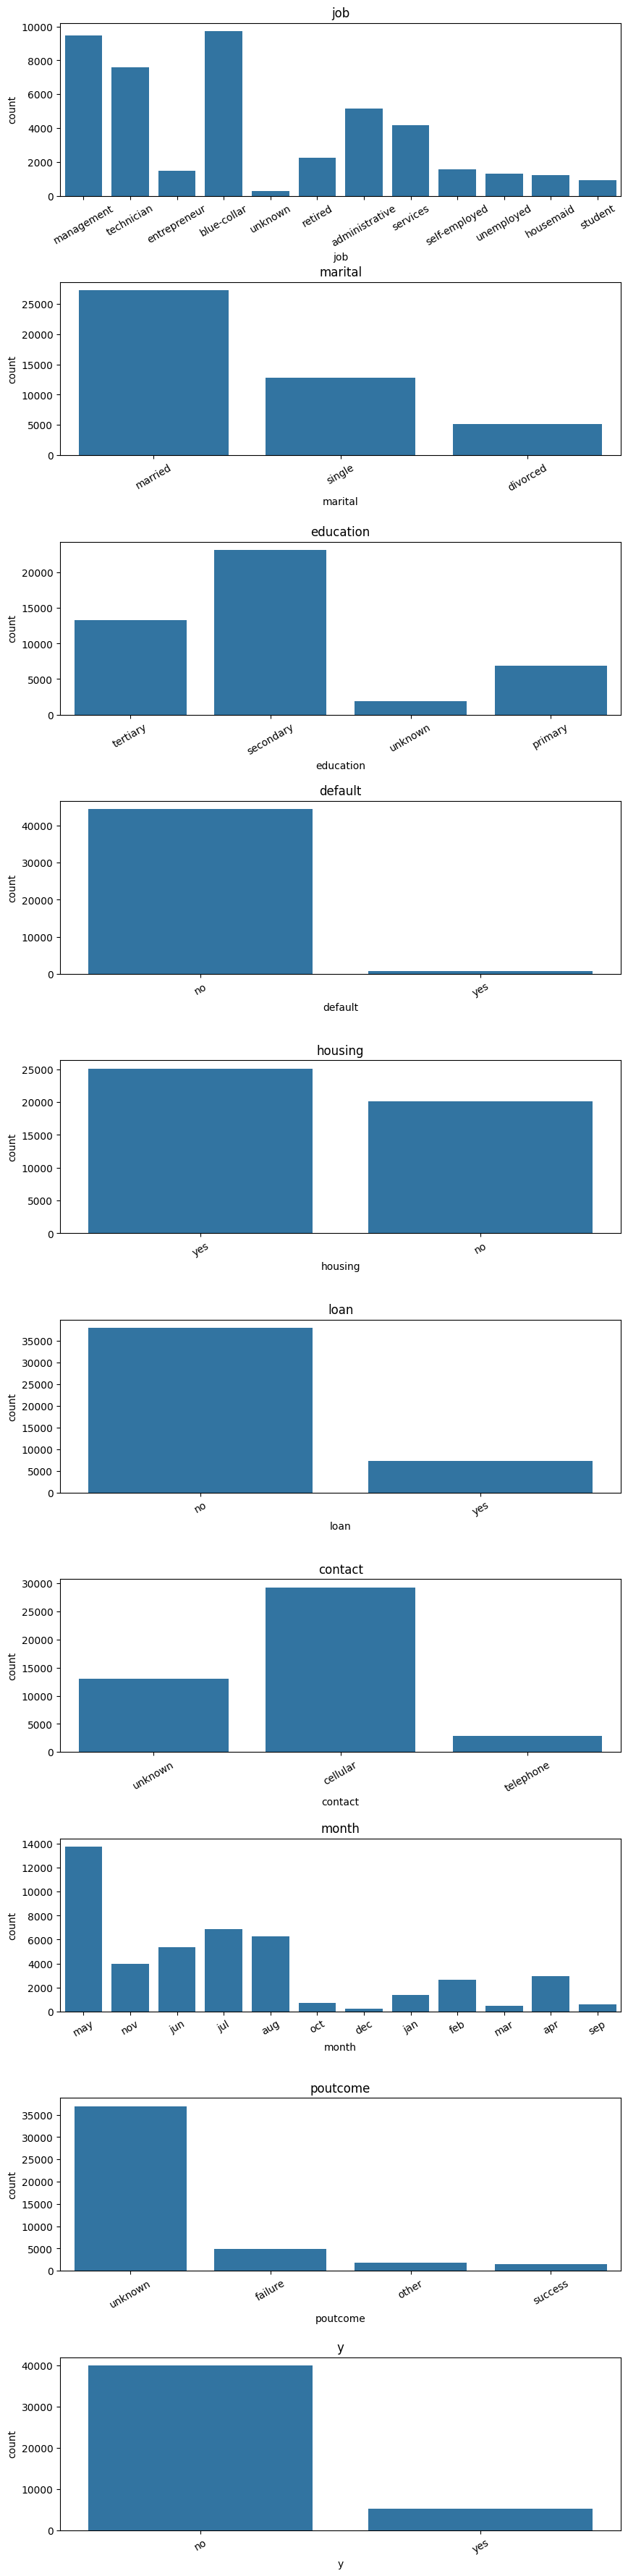

In [ ]:
# Tomemos las variables categóricas (object) y generemos gráficos de barras

# Categorica no ordenada: Estas variables no tienen peso o medida, no tienen orden

col_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=clientes_Banco, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

job
blue-collar       9727
management        9455
technician        7592
administrative    5168
services          4152
retired           2263
self-employed     1578
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
Name: count, dtype: int64


job
blue-collar       0.215251
management        0.209232
technician        0.168005
administrative    0.114364
services          0.091881
retired           0.050079
self-employed     0.034920
entrepreneur      0.032884
unemployed        0.028834
housemaid         0.027440
student           0.020735
unknown           0.006373
Name: proportion, dtype: float64

Grafico Barras 



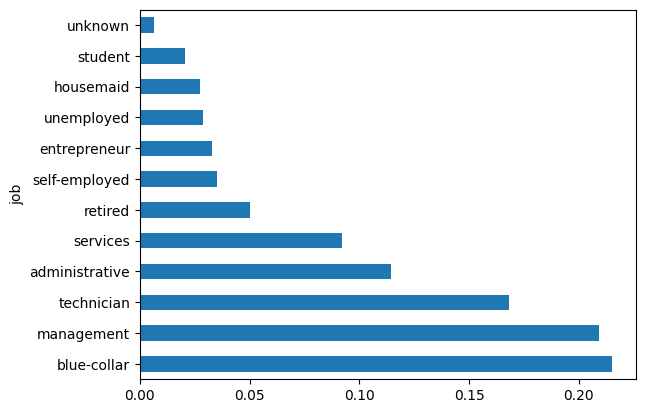

In [ ]:
# Otra forma es contar  cada una de las ocurrencias de la variable categorica
# y luego normalizar el conteo
print(clientes_Banco.job.value_counts())
print("\n")
print(clientes_Banco.job.value_counts(normalize=True))


print("\nGrafico Barras \n")
clientes_Banco.job.value_counts(normalize=True).plot.barh()
plt.show()


education
secondary    0.513112
tertiary     0.294275
primary      0.151519
unknown      0.041094
Name: proportion, dtype: float64


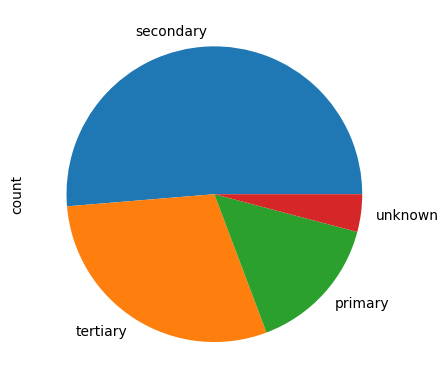

In [ ]:
# No necesariamente deben ser graficas de barras pueden usar cualquier tipo
print(clientes_Banco.education.value_counts(normalize=True))
clientes_Banco.education.value_counts().plot.pie()
plt.show()

## **Observaciones:**

Los niveles de cada variable de interés:
- '**job**': 12
- '**marital**': 3 (married, single, divorced)
- '**education**': 4 (primary, secondary, tertiary, unknown)
- '**default**': 2 (Yes, No). En este caso la gran mayoría de contactados tienen valores 'No'
- '**housing**': 2 (Yes, No). En este caso el set está relativamente balanceado.
- '**loan**': 2 (Yes, No). En este caso la gran mayoría contiene valores 'No'.
- '**poutcome**': 4 (unknown, failure, other, success). La gran mayoría está en el nivel 'unknown' desconocido.
- '**y**': 2 (No, Yes). La gran mayoría está en el nivel 'No', casi 40.000.

- Si mas adelante se implemente algún modelo predictivo con aprendizaje de maquina (*Machine Learning*) se debe tener en **cuenta este desbalance**.

### **Eliminemos las columnas que no tienen que ver con la pregunta a resolver**

In [ ]:
# Eliminemos las columnas "contact", "month", "day", "duration", "campaign",
# "pdays" y "previous" pues no aportan información sobre el perfil del cliente

clientes_Banco.drop(columns=['contact','month', 'day', 'duration', 'campaign', 'pdays',
                   'previous'],inplace=True)
print(clientes_Banco.columns)
print('\n')
clientes_Banco.info()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   poutcome   45189 non-null  object 
 9   y          45189 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


### **Comportamiento de las variables numéricas**

## Veamos inicialmente el comportamiento de las variables numéricas ('**age**' y '**balance**'), que fueron las unicas que quedaron despues de la eliminacion.

In [ ]:
# Podemos extraer algunos estadísticos descriptivos
clientes_Banco.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


<ipython-input-62-f142cefe3a08>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clientes_Banco['balance'])


<Axes: xlabel='balance', ylabel='Density'>

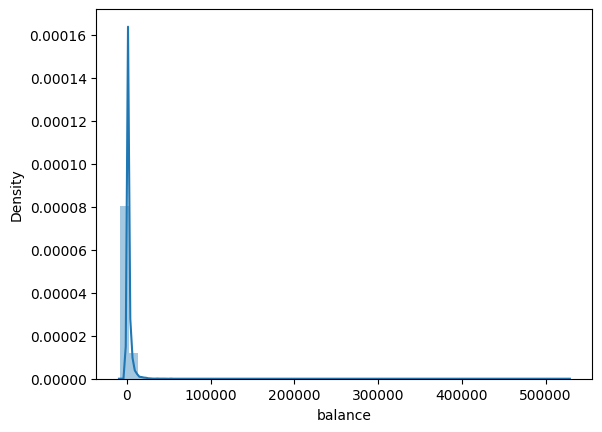

In [ ]:
# Pero muchas veces es más útil graficar dichas variables
sns.distplot(clientes_Banco['balance'])

<ipython-input-63-5ebefcdc9bb3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clientes_Banco['age'])


<Axes: xlabel='age', ylabel='Density'>

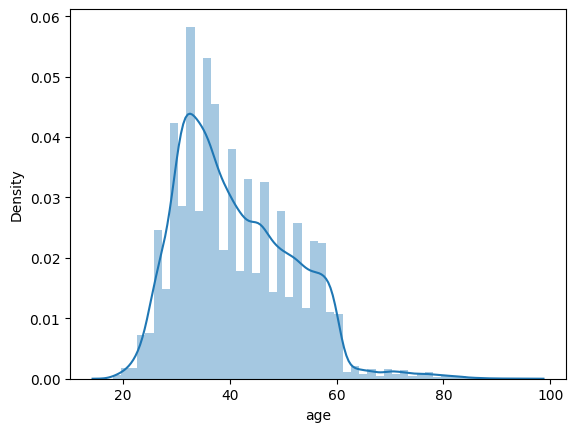

In [ ]:
# Pero muchas veces es más útil graficar dichas variables
sns.distplot(clientes_Banco['age'])

<Axes: xlabel='age', ylabel='Density'>

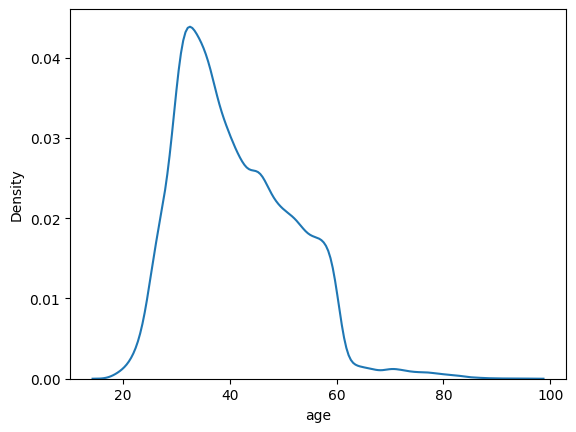

In [ ]:
sns.kdeplot(data=clientes_Banco, x="age")

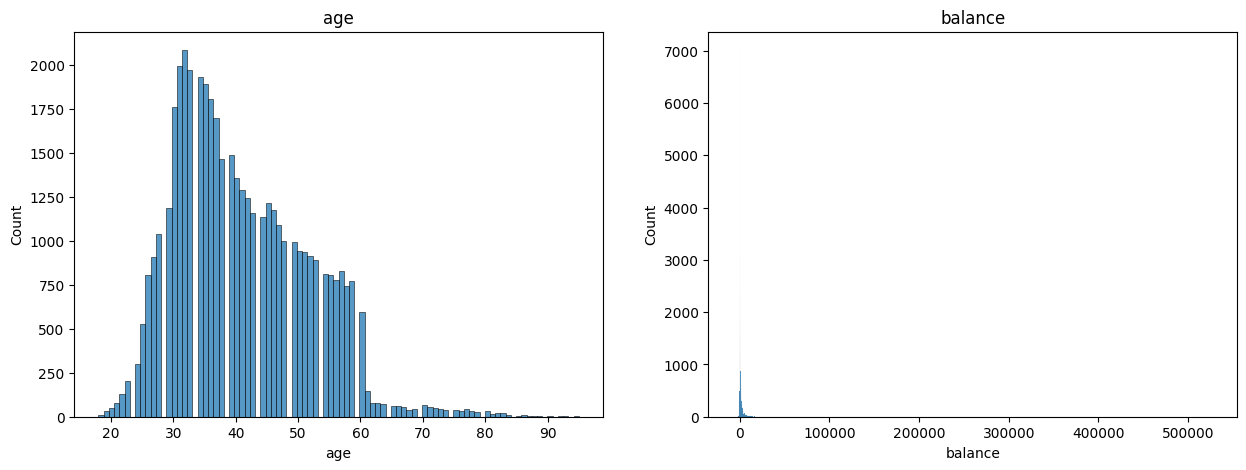

In [ ]:
# Dibujamos el histogramas

col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.histplot(x=col, data=clientes_Banco, ax=ax[i])
    ax[i].set_title(col)

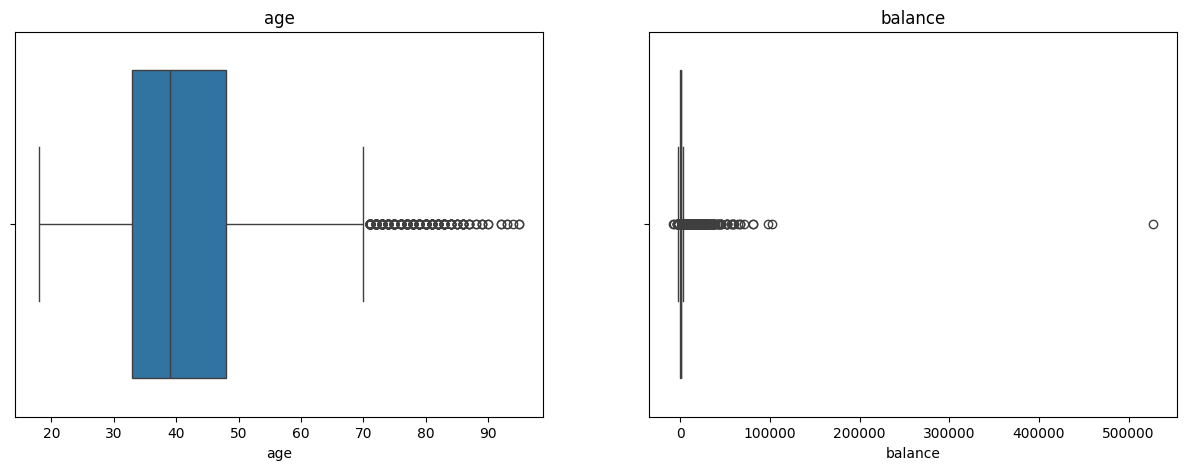

In [ ]:
# dado que no se puede apreciar los datos de forma correcta en el histograma
# Generemos grafico de cajor y vigotes

col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=clientes_Banco, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
# dado que no se puede apreciar los datos de forma correcta veamos en detalle lo que ocurre con balance
clientes_Banco['balance'].describe()

,balance
count,45189.000000
mean,1374.012149
std,3924.370039
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,527532.000000


## **Observaciones:**

- La mayor parte del grupo contactado tiene edades entre los **30** y los **50** años, con sesgo hacia los **30-40** años
- La mayor parte del grupo contactado (**75%**) tiene saldos o negativos o que no superan los **1500 euros** aproximadamente.

#**4.2 Análisis univariado**

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('age', 'balance', 'job', 'marital', 'education', etc.) y la variable a predecir ('y').

Esto se conoce como análisis univariado.

**NOTA**

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

In [ ]:
# Comencemos representando la variable a predecir de forma binaria:
# 'yes' = 1, 'no' = 0, dado que en forma categorica se presta confusion
diccionario = {'yes':1, 'no':0}
binario = clientes_Banco['y'].map(diccionario)
clientes_Banco['y_bin'] = binario
clientes_Banco.drop(columns=['y'],inplace=True)
# De esta forma resulta fácil calcular la tasa de aceptacion: el promedio
# de la columna 'y_bin'
clientes_Banco

,age,job,marital,education,default,balance,housing,loan,poutcome,y_bin
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,0
...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,unknown,1
45185,71,retired,divorced,primary,no,1729.0,no,no,unknown,1
45186,72,retired,married,secondary,no,5715.0,no,no,success,1
45187,57,blue-collar,married,secondary,no,668.0,no,no,unknown,0


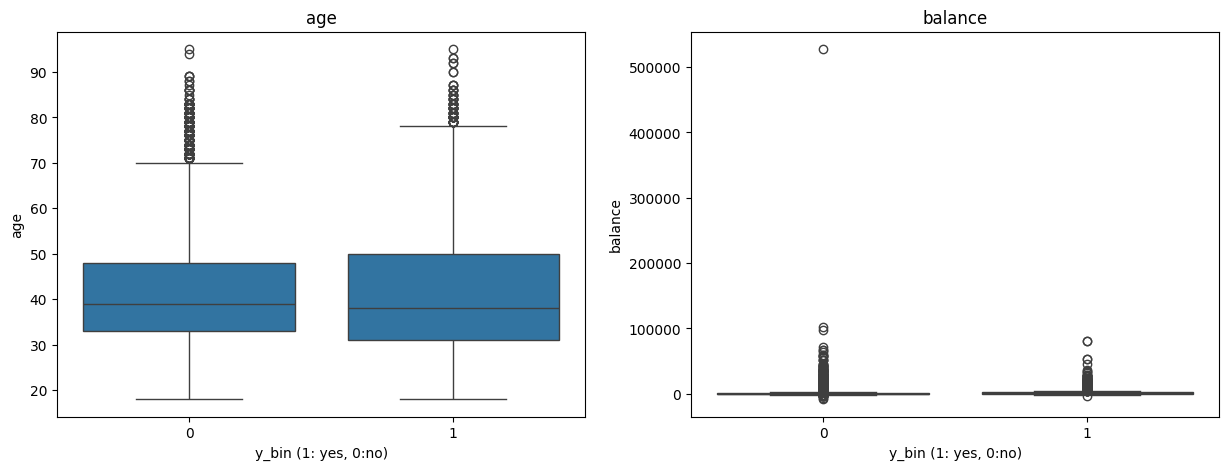

In [ ]:
# Analizar la relación entre las variables numéricas y la variable a predecir ('y')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

# Diagrama de Cajon y bigotes
for i, col in enumerate(col_num):
  bplt = sns.boxplot(x="y_bin", y=col, data=clientes_Banco, ax=ax[i])
  ax[i].set_xlabel('y_bin (1: yes, 0:no)')
  ax[i].set_title(col)

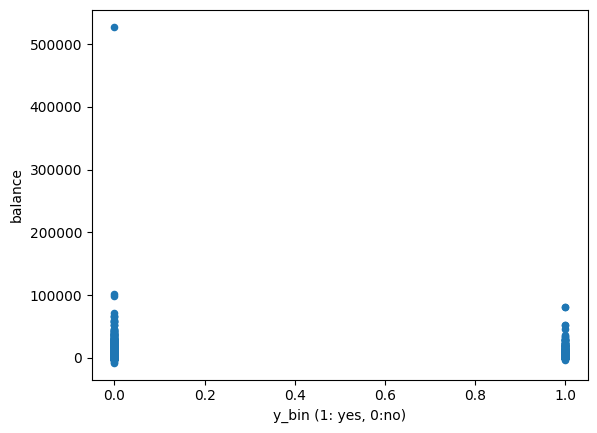

In [ ]:
clientes_Banco.plot.scatter(x="y_bin",y="balance")
plt.xlabel('y_bin (1: yes, 0:no)')
plt.show()

## **Observaciones:**
- Ni en la edad '**age**' ni en saldo promedio '**balance**' se observan diferencias entre las personas que adquirieron o no el producto.
- Al parecer las variables numéricas no resultan en principio siendo variables predictivas.

Sin embargo estas variables numéricas se encuentran en un amplio rango.

Podemos calcular las tasas de aceptacion definiendo intervalos para estas variables numéricas y ver si podemos extraer información relevante de ese análisis:

In [ ]:
# Función para graficar tasas de aceptacion

def graficar_tasas_aceptacion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de aceptacion (mean),
    # multiplicarla por 100 (mul(100))
    grupo = clientes_Banco.groupby(x)[y].mean().mul(100).rename('tasa_acep').reset_index()

    # Generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_acep', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_acep', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=var_predictora, y='tasa_acep', data=grupo)
        plt.grid()

## **Observaciones:**

- En este caso SÍ se observan diferencias en las tasas de aceptacion por edad
- Podríamos establecer tres rangos aproximados: 18-25 años, 26-59 años y 60 años en adelante

In [ ]:
clientes_Banco.loc[:,'grupos_edad'] = "18-25"
clientes_Banco

,age,job,marital,education,default,balance,housing,loan,poutcome,y_bin,grupos_edad
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,0,18-25
1,44,technician,single,secondary,no,29.0,yes,no,unknown,0,18-25
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,0,18-25
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,0,18-25
4,33,unknown,single,unknown,no,1.0,no,no,unknown,0,18-25
...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,unknown,1,18-25
45185,71,retired,divorced,primary,no,1729.0,no,no,unknown,1,18-25
45186,72,retired,married,secondary,no,5715.0,no,no,success,1,18-25
45187,57,blue-collar,married,secondary,no,668.0,no,no,unknown,0,18-25


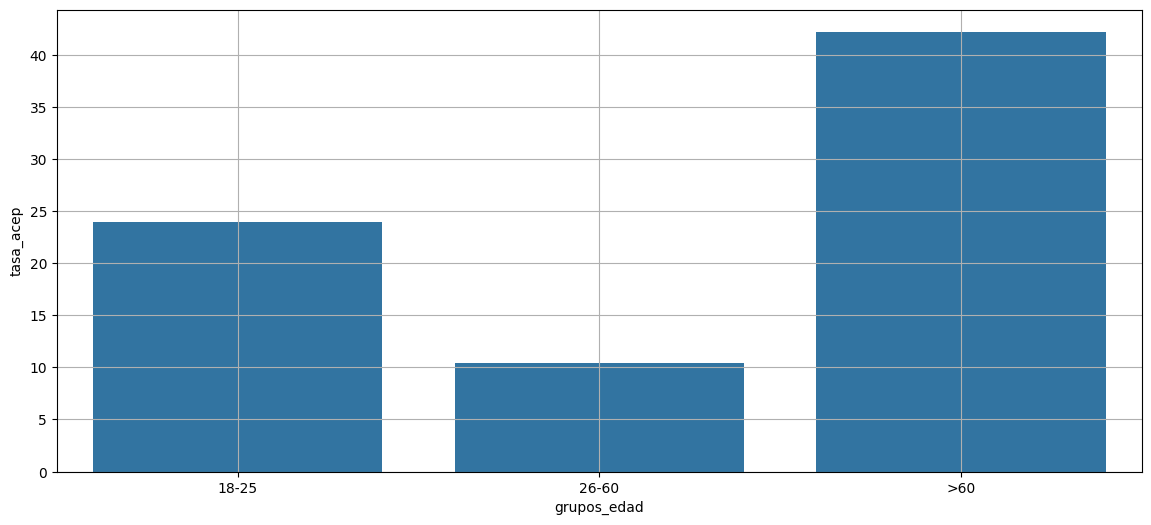

In [ ]:
# Creemos subrupos de edades y calculemos las tasas de aceptacion en cada caso

# Nueva columna en el dataset: "grupos_edad"
clientes_Banco.loc[:,'grupos_edad'] = "18-25"
clientes_Banco.loc[clientes_Banco['age']>60,'grupos_edad'] = ">60"
clientes_Banco.loc[(clientes_Banco['age']>25)&(clientes_Banco['age']<=60), 'grupos_edad'] = "26-60"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_aceptacion('grupos_edad','y_bin',type='bar')

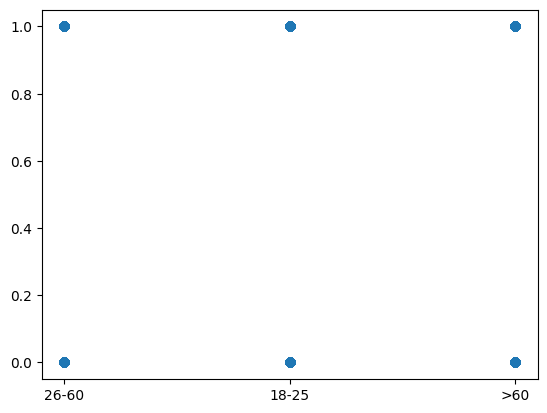

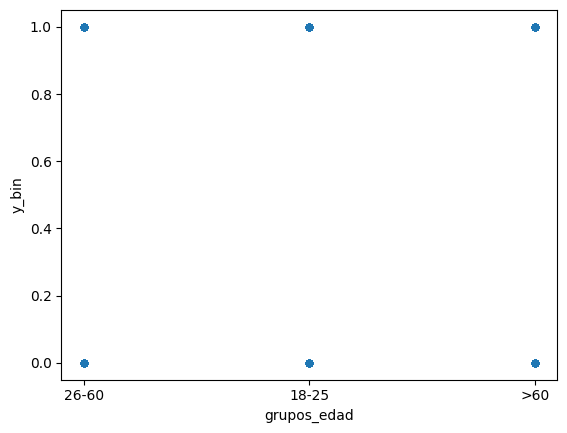

In [ ]:
plt.scatter(clientes_Banco.grupos_edad,clientes_Banco.y_bin)
plt.show()

clientes_Banco.plot.scatter(x="grupos_edad",y="y_bin")
plt.show()

In [ ]:
clientes_Banco

,age,job,marital,education,default,balance,housing,loan,poutcome,y_bin,grupos_edad
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,0,26-60
1,44,technician,single,secondary,no,29.0,yes,no,unknown,0,26-60
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,0,26-60
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,0,26-60
4,33,unknown,single,unknown,no,1.0,no,no,unknown,0,26-60
...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,unknown,1,26-60
45185,71,retired,divorced,primary,no,1729.0,no,no,unknown,1,>60
45186,72,retired,married,secondary,no,5715.0,no,no,success,1,>60
45187,57,blue-collar,married,secondary,no,668.0,no,no,unknown,0,26-60


## **Observaciones:**

- Tenemos 3 rangos de edad bastante diferenciados y para los cuales se alcanzan diferentes tasas de aceptacion del producto: **18-25 años** (24%), **26-60 años** (11%), más de **60 años** (43%)

In [ ]:
# Eliminemos la columna "age" (dejando sólo los grupos de edad)
clientes_Banco.drop(columns=['age'], inplace=True)

In [ ]:
clientes_Banco

,job,marital,education,default,balance,housing,loan,poutcome,y_bin,grupos_edad
0,management,married,tertiary,no,2143.0,yes,no,unknown,0,26-60
1,technician,single,secondary,no,29.0,yes,no,unknown,0,26-60
2,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,0,26-60
3,blue-collar,married,unknown,no,1506.0,yes,no,unknown,0,26-60
4,unknown,single,unknown,no,1.0,no,no,unknown,0,26-60
...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,no,825.0,no,no,unknown,1,26-60
45185,retired,divorced,primary,no,1729.0,no,no,unknown,1,>60
45186,retired,married,secondary,no,5715.0,no,no,success,1,>60
45187,blue-collar,married,secondary,no,668.0,no,no,unknown,0,26-60


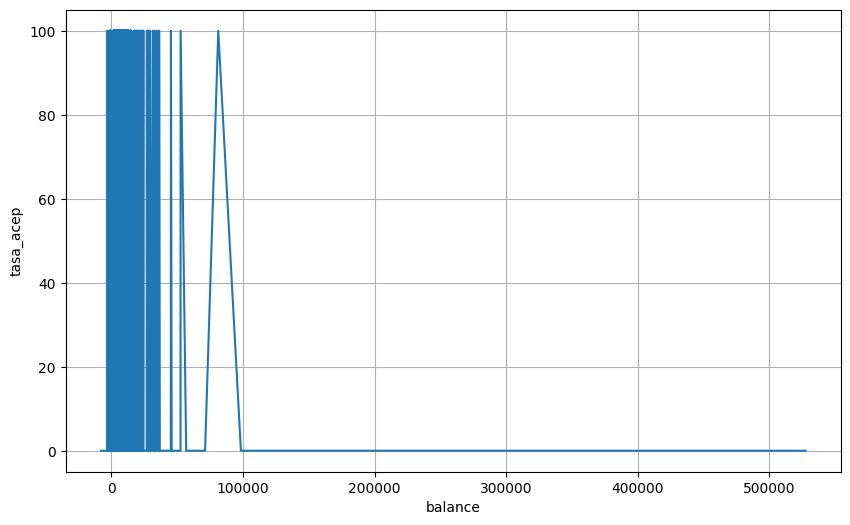

In [ ]:
# Realicemos el mismo análisis pero para la variable 'balance'
graficar_tasas_aceptacion('balance','y_bin')

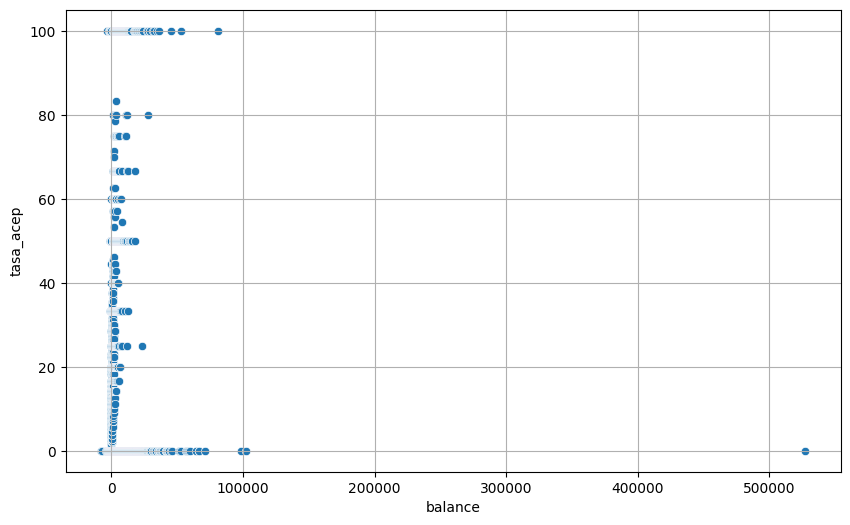

In [ ]:
# Realicemos el mismo análisis pero para la variable 'balance'
graficar_tasas_aceptacion('balance','y_bin',type='scatter')

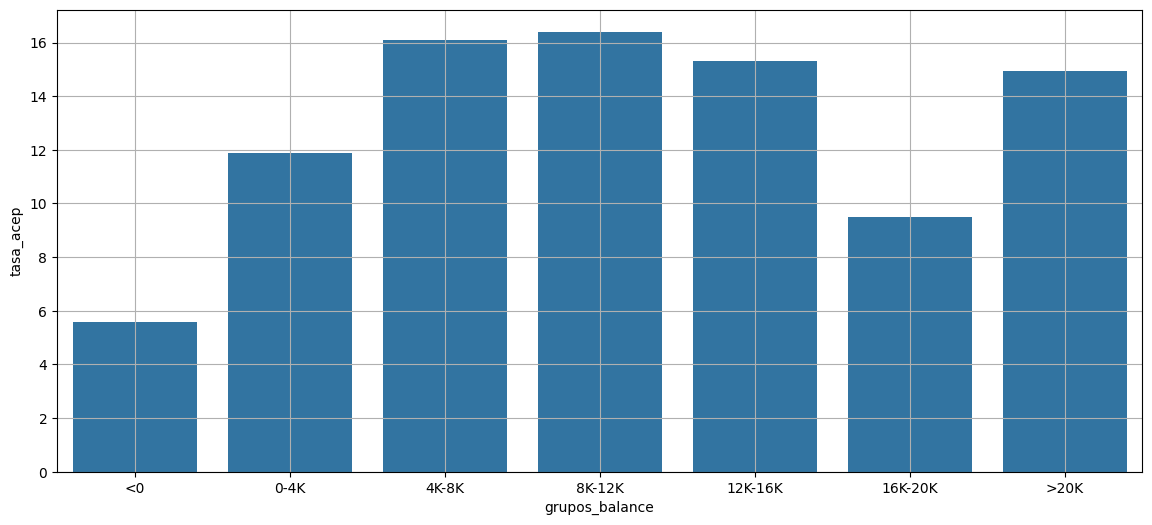

In [ ]:
# No resulta fácil ver un patrón. Al igual que con la edad generemos
# diferentes rangos en este caso con un paso de 4000:
# <0
# 0-4000
# 4000-8000
# 8000-12000
# 12000-16000
# 16000-20000
# >20000

# Nueva columna en el dataset: "grupos_balance"
clientes_Banco.loc[:,'grupos_balance'] = "<0"
clientes_Banco.loc[(clientes_Banco['balance']>=0) & (clientes_Banco['balance']<4000),'grupos_balance'] = "0-4K"
clientes_Banco.loc[(clientes_Banco['balance']>=4000) & (clientes_Banco['balance']<8000),'grupos_balance'] = "4K-8K"
clientes_Banco.loc[(clientes_Banco['balance']>=8000) & (clientes_Banco['balance']<12000),'grupos_balance'] = "8K-12K"
clientes_Banco.loc[(clientes_Banco['balance']>=12000) & (clientes_Banco['balance']<16000),'grupos_balance'] = "12K-16K"
clientes_Banco.loc[(clientes_Banco['balance']>=16000) & (clientes_Banco['balance']<20000),'grupos_balance'] = "16K-20K"
clientes_Banco.loc[clientes_Banco['balance']>=20000,'grupos_balance'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<0', '0-4K', '4K-8K', '8K-12K', '12K-16K', '16K-20K', '>20K']
graficar_tasas_aceptacion('grupos_balance','y_bin',type='bar', order=orden)

## **Observaciones:**

- Al parecer hay un patrón. Si organizamos las barras de forma ascendente observamos:
    - <0: 6%
    - 0-4K: 12%
    - 4K-8K: 16%
    - 8K-12K: 16%
    - 12K-16K: 15%
    - 16K-20K: 9%
    - Mayor a 20K: 15%

- Exceptuando el rango **16K-20K**, en general un mayor nivel de liquidez genera una mayor tasa de conversión.
- Podríamos definir 4 rangos de interés para simplificar el análisis:
  - 0-4K
  - 4K-16K
  - 16K-20K
  - Mayor a 20K

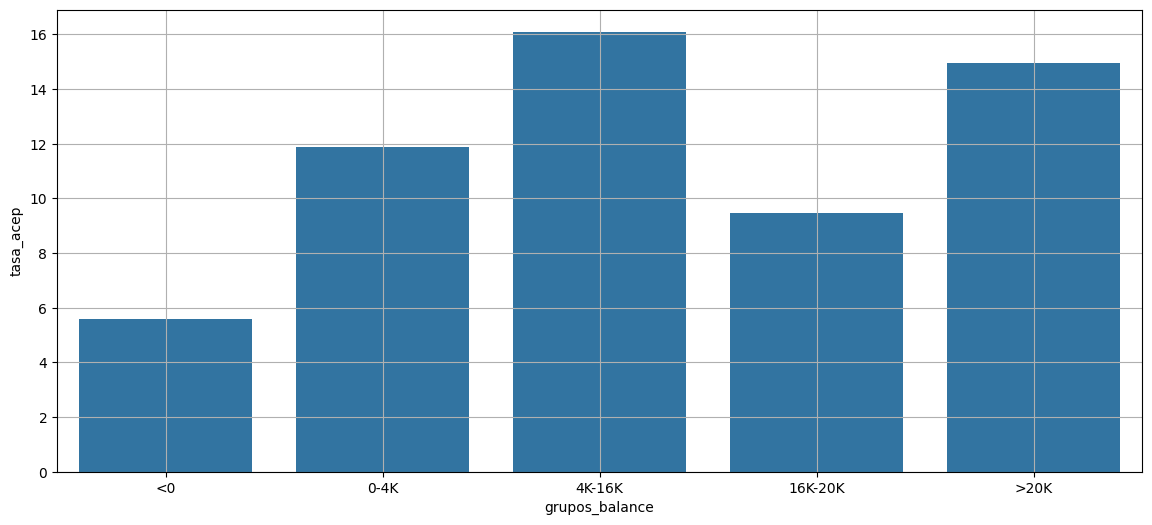

In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

# Nueva columna en el dataset: "grupos_balance"
clientes_Banco.loc[:,'grupos_balance'] = "<0"
clientes_Banco.loc[(clientes_Banco['balance']>=0) & (clientes_Banco['balance']<4000),'grupos_balance'] = "0-4K"
clientes_Banco.loc[(clientes_Banco['balance']>=4000) & (clientes_Banco['balance']<16000),'grupos_balance'] = "4K-16K"
clientes_Banco.loc[(clientes_Banco['balance']>=16000) & (clientes_Banco['balance']<20000),'grupos_balance'] = "16K-20K"
clientes_Banco.loc[clientes_Banco['balance']>=20000,'grupos_balance'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
orden = ['<0','0-4K','4K-16K','16K-20K','>20K']
graficar_tasas_aceptacion('grupos_balance','y_bin',type='bar', order=orden)

In [ ]:
clientes_Banco

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,0,26-60,0-4K
1,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0,26-60,0-4K
2,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,0,26-60,0-4K
3,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,0,26-60,0-4K
4,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,0,26-60,0-4K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,1,26-60,0-4K
45185,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,1,>60,0-4K
45186,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,1,>60,4K-16K
45187,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,0,26-60,0-4K


In [ ]:
# Eliminemos la columna "balance"
clientes_Banco.drop(columns=['balance'], inplace=True)

## Ahora realizaremos un análisis similar pero para las variables categóricas:

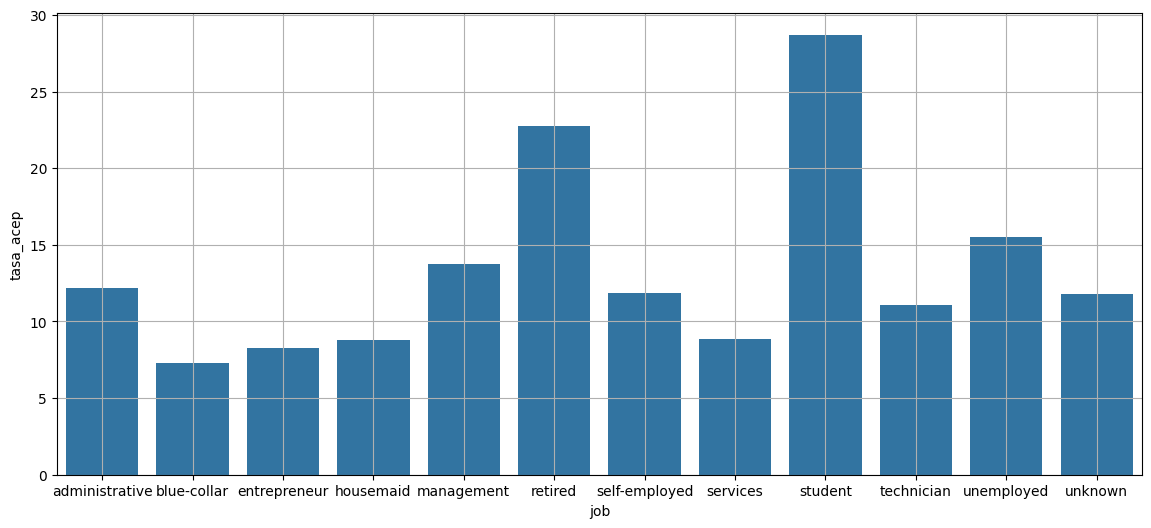

In [ ]:
graficar_tasas_aceptacion('job', 'y_bin', type='bar')

## **Observaciones:**

- Las tasas de aceptacion del producto oscilan entre 8% y 28% aproximadamente
- Los trabajos "retired" y "student" tienen las tasas de conversión más altas (23% y 28%)
- **"Job" podría ser una variable predictora**

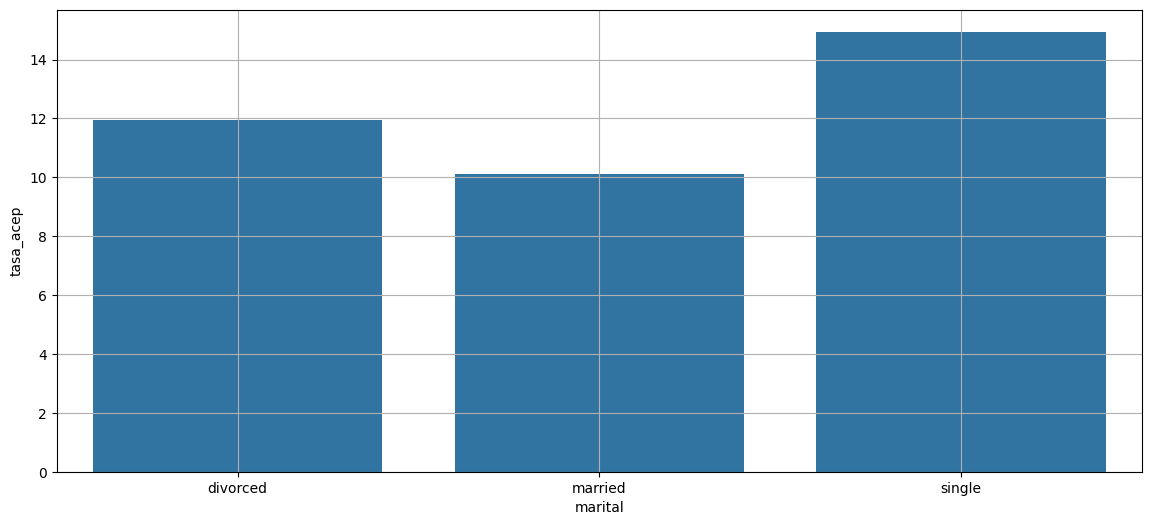

In [ ]:
# Marital
graficar_tasas_aceptacion('marital','y_bin',type='bar')

## **Observaciones:**

- Las tasas de conversión son muy similares para los diferentes niveles en la variable "marital"
- **"Marital" parece no ser una variable predictora**

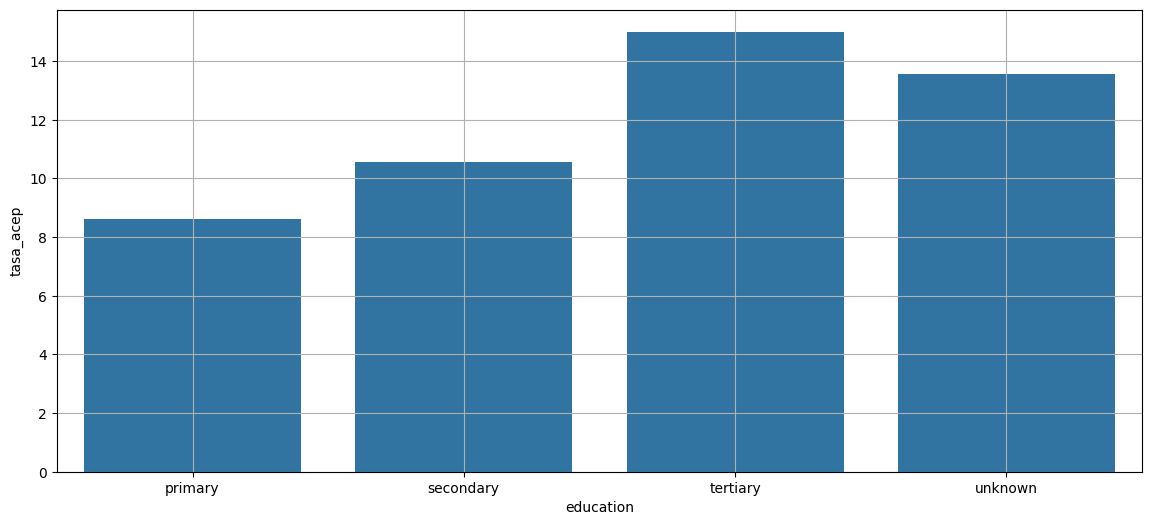

In [ ]:
# education
graficar_tasas_aceptacion('education','y_bin',type='bar')

## **Observaciones:**

- Hay un ligero incremento en la tasa de conversión a medida que aumenta el nivel educativo.
- **"Education" podría ser una variable predictora**

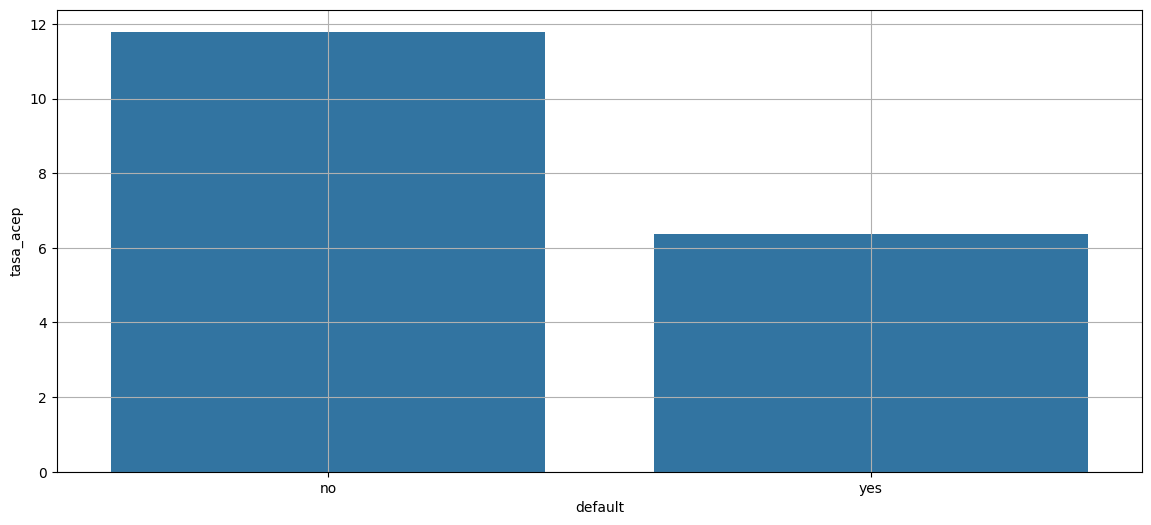

In [ ]:
# default
graficar_tasas_aceptacion('default','y_bin',type='bar')

## **Observaciones**:

- Las tasas de aceptacion para quienes no tienen "default" son de casi el doble para quienes sí lo tienen (12% vs. 6% aproximadamente).
- **"Default" podría ser una variable predictora**

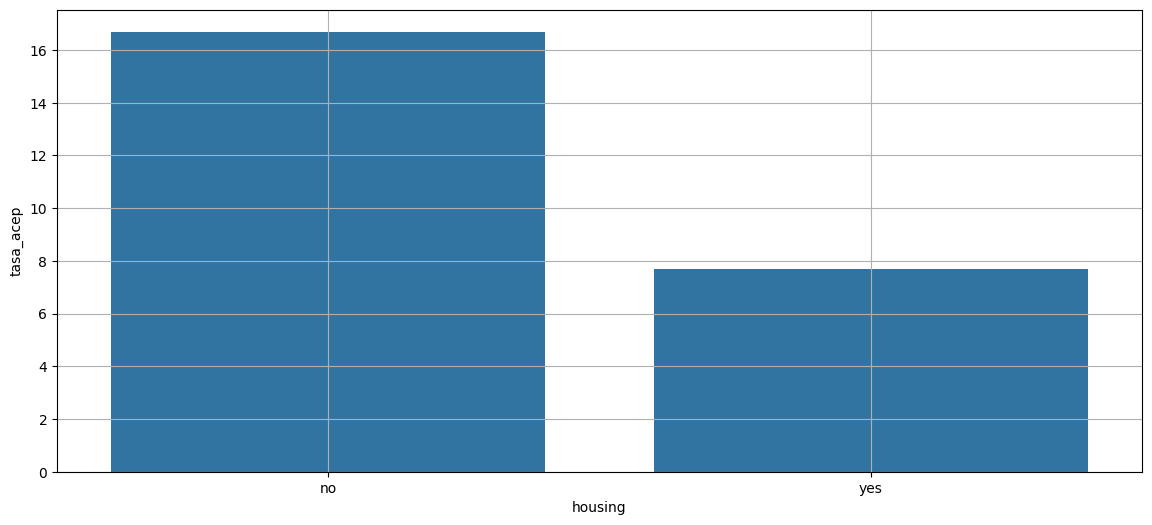

In [ ]:
# housing
graficar_tasas_aceptacion('housing','y_bin',type='bar')

## **Observaciones:**

- Quienes no tienen crédito hipotecario ("housing"=no) definitivamente tienen mayores tasas de aceptacion.
- **"Housing" es una variable predictora.**

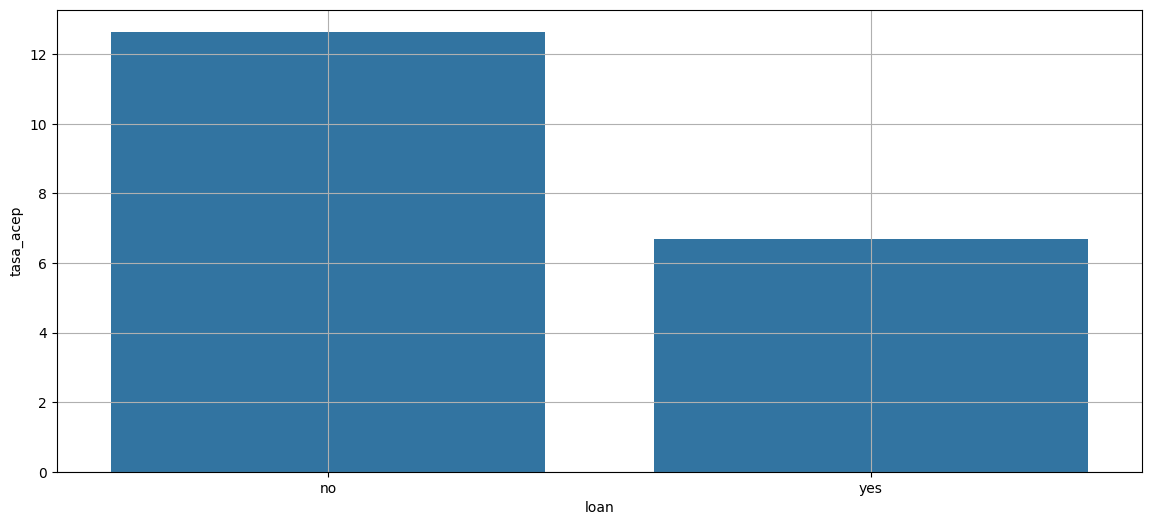

In [ ]:
# loan
graficar_tasas_aceptacion('loan','y_bin',type='bar')

## **Observaciones:**

- Con "loan" ocurre algo similar a "housing": quienes NO tienen créditos de consumo presentan definitivamente mayores tasas de aceptacion
- **"Loan" es una variable predictora**

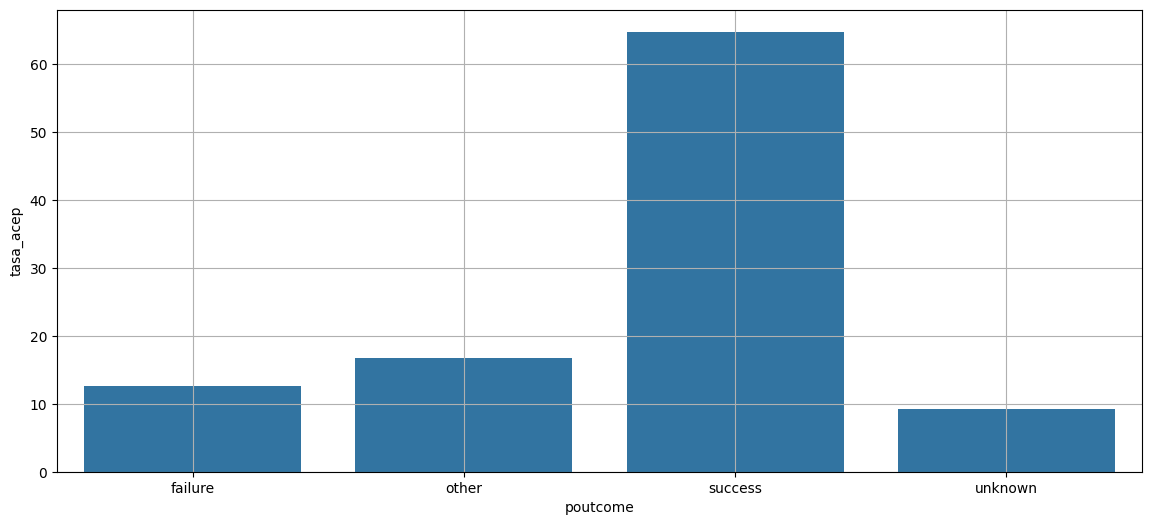

In [ ]:
# poutcome
graficar_tasas_aceptacion('poutcome','y_bin',type='bar')

## **Observaciones:**

- Si el cliente adquirió un producto en la campaña anterior (poutcome = success) es más probable que adquiera este nuevo producto con el banco
- **poutcome definitivamente es una variable predictora**

## **Resumen**

Las variables predictoras con mayor impacto en la tasa de aceptacion del producto parecen ser, en orden de importancia

1. **poutcome**: casi 70% de conversión para el nivel "success"
2. **job**: con tasas de 22% y 28% para 'retired' y 'student'
2. **grupos_balance** y **grupos_edad**, con tasas de conversión cercanas al 16% para varios intervalos
3. **default**, **housing** y loan con tasas de conversión entre 12% y 16% para los niveles "no"
4. **marital** y **education**, con niveles de conversión comparables con default, housing y loan.

In [ ]:
#exportar a csv
clientes_Banco.to_csv('Clientes_Banco_Univariado.csv', index=False)
clientes_Banco

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,no,yes,no,unknown,0,26-60,0-4K
1,technician,single,secondary,no,yes,no,unknown,0,26-60,0-4K
2,entrepreneur,married,secondary,no,yes,yes,unknown,0,26-60,0-4K
3,blue-collar,married,unknown,no,yes,no,unknown,0,26-60,0-4K
4,unknown,single,unknown,no,no,no,unknown,0,26-60,0-4K
...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,no,no,no,unknown,1,26-60,0-4K
45185,retired,divorced,primary,no,no,no,unknown,1,>60,0-4K
45186,retired,married,secondary,no,no,no,success,1,>60,4K-16K
45187,blue-collar,married,secondary,no,no,no,unknown,0,26-60,0-4K


# **Para resumir el análisis veamos que es cada uno y en que se diferencia:**

Un análisis **individual** de una variable se centra exclusivamente en comprender esa única variable en un conjunto de datos, mientras que un Análisis Exploratorio de Datos (EDA) **univariado** implica explorar todas las variables de forma independiente.

Aquí hay algunas diferencias clave entre ambos:

- **Enfoque**: En un análisis individual de una variable, el enfoque está completamente en entender esa variable en particular, incluyendo su distribución, estadísticas descriptivas y características únicas. En contraste, en un **EDA univariado**, se analizan todas las variables en el conjunto de datos de forma independiente, una a una, para comprender sus propiedades individuales.

- **Objetivo**: El objetivo principal de un análisis individual de una variable es comprender profundamente esa variable en particular, incluyendo su comportamiento y características específicas. Por otro lado, el objetivo de un **EDA univariado** es obtener una visión general de todas las variables en el conjunto de datos, identificando patrones generales y posibles áreas de interés para un análisis más detallado.

- **Técnicas utilizadas**: En un análisis individual de una variable, se pueden utilizar técnicas específicas para explorar esa variable en detalle, como histogramas, gráficos de densidad, estadísticas descriptivas, entre otros. En un **EDA univariado**, se pueden aplicar las mismas técnicas a todas las variables de manera independiente para comparar sus distribuciones y propiedades.

- **Profundidad de análisis**: Un análisis individual de una variable puede llevar a cabo un examen más detallado y exhaustivo de esa variable en particular, incluyendo la identificación de valores atípicos, la evaluación de la normalidad de la distribución, y la búsqueda de relaciones con otras variables. Por otro lado, un **EDA univariado** generalmente proporciona una visión más superficial de todas las variables en el conjunto de datos, permitiendo una evaluación rápida de su distribución y comportamiento general.

<p align="left"><b><font face='Courier New' color="white" align="left" size=4>Copyright.</font></b>
<img alt="GIIAM" height="120px" src="https://pascualbravo.edu.co/investigacion/giiam/" align="right" hspace="10px" vspace="0px" height="120" width="350"">
                                                                                                                              
<font face='Verdana' size="2.5">
Andres Fernando Perez G. <a href="https://scienti.minciencias.gov.co/cvlac/visualizador/generarCurriculoCv.do?cod_rh=0000347507">  CvLAC</a><br>
I.U Pascual Bravo.<br>
Calle 73 # 73A – 226<br>
Medellín, Colombia. South America.
    
</p>
</font>
    
</p>
</font>

<center><b><font color='01b3c2' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="4">I.U Pascual Bravo.</font></b> </center>